<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU_12_1_%EB%B9%84%EC%A7%80%EB%8F%84%EA%B5%B0%EC%A7%91_k_means_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 비 지도 학습 ]]

정답이 없는 상태에서 학습하는 방법


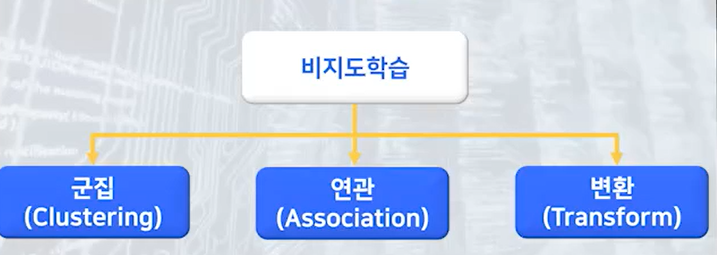


 지도학습 ( 회귀, 분류 )
 비지도학습 (군집, 연관, 변환 )

  -. 비슷한 특징끼리 군집하 하여 새로운 데이터에 대한 결과를 예측하는 방법
  
  -. 라벨링(정답)이 되어 있지 않은 데이터로부터 패턴이나 형태를 찾아야 하기 때문에 지도학습보다는 난이도가 있음.

o.  군집화 (clustering) 대상들을 구분해서 그룹을 만듦

(분류 와의 차이) 대상이 어떤 그룹에 속하는지 판단 하는 것.

군집화 : 만듦.   vs.  분류 : 판단   

o. 연관 : (association) 서로 연관된 특징 (열)을 찾아 내는 것.
    
  주로 추천과 관련된 부분에 사용

  일명 장바구니 분석
    ( ex: 라면 과 계란 )



o. 변환
   : 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이
     원래 데이터보다 쉽게 해석할 수 있도록 만드는 것

     -. 차원 축소 ( Dimension Reduction )

       차원이 많은 고차원의 데이터의 중요하지 않은 특성을 빼서 꼭 필요한 특징만 데이터로 표현하는 것.

       


K - means 알고리즘

. 알고리즘 개요 . 서로 유사한 데이터는 동일 그룹으로, 유사하지 않은 데이터는 다른 그룹으로 분류하는 군집 분석의 대표적인 K- means 알고리즘.

K (그룹화 하는 클러스터 또는 크럴스터 중김 새구), mean( 클러스터 중심과 데이터들의 평균 거리)로 구성 ( 중심 ? centroid )

 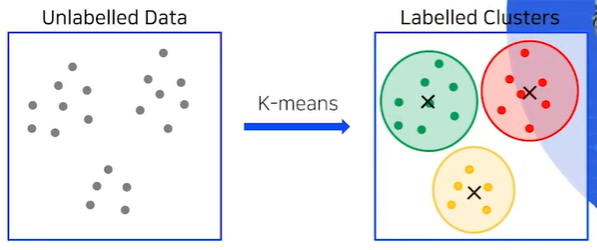

 K의 갯수는 사전에 정의  ( 3개로 정의 ).

 정답이 없으므로, label을 붙여 가면서 분리 한다.  


 알고리즘 개요
   . 데이터 셋에서 K개의 centroid를 임시 저장한 후, 각 데이터들을 가장 가까운 centroid가 속한 그룹에 할당, 다시 centroid 업데이 후 centroid가 변하지 않을 때까지 반복함으로써 , 각 클러스터와 거리 차이의 분산을 최소화 하는 방식으로 동작

   

step-2 에서 . centroid를 임으로 잡고, 거리를 계산하면서
step-3에서  centroid를 이동시키고, 거리를 계산하면. .
이 동작을 계속 반복하면서 centroid의 변화가 없을 때까지 반복하게 된다.

이 동작을 통해  label이 없는 것이 최종 label로 구분될 수 있도록 한다.

[ 접근 방법 ]
  1. 변수들 간의 상관성을 시각화
  2. 라벨이 없다는 가정에서 비지도 학습을 통해 clustering

  

1. 필요 PKG IMPORT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans   ## K-Means이 패키지 import


2. DATA 탐색

In [ ]:

df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.info()

In [ ]:
df.head()

3. 전처리

In [ ]:
## species 컬럼의 값을 0, 1, ,2 로 레이블인코딩 한다.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df

In [ ]:


## 변수간 상관관계의 시각화

import seaborn as sns
sns.pairplot( df, hue = "species")



4. DATA SET 준비

In [ ]:
df_copy = df

df_copy

In [ ]:
df_copy2 = df.copy()
df_copy2

5. 분석과 예측

In [ ]:


## KMeans 객체 생성

cluster1 =  KMeans(n_clusters = 3, n_init=10, max_iter = 500, random_state = 42, algorithm='elkan')

## 생성 모델로 데이터 학습

cluster1.fit(df_copy)

In [ ]:


#결과 값을 변수에 저장

cluster1_labels = cluster1.labels_
cluster1_centers = cluster1.cluster_centers_    ## 각 군집의 중심점 결과 저장, 분류값
cluster1_prediction = cluster1.predict(df_copy)     ## 각 예측 군집 결과 저장
print(pd.DataFrame(cluster1_centers))  ## cluster 중심점 출력
print(cluster1_prediction)  ## 예측 군집 결과 출력

print(df["species"].ravel())    ## 정답 데이터 출력,, ravel 은 출력 형식 (세로를 가로로 변환 출력)

분류 이기 때문에 값의 의미는 중요하지 않다. 값의 구분이 잘 되어 있는가가 중요하다.

즉 , 위 예측값과 정답간의 차이가 없음을 알 수 있다

In [ ]:

## 기존 data에 예측된 군집 결과를 붙인다.

df_copy["cluster"] = cluster1_prediction
df_copy

값이 다르니까,  값을 변경해 주자.

In [ ]:



## 군집화 결과

plt.figure( figsize =(20,6))

X = df_copy
plt.subplit(131)
sns.scatterplot(x=X.iloc[:,0], )

6. 성능 평가

 비지도학습의 성능 평가 방법 , k-means를 사용할 때 ?



7. insight 분석

K-means 알고리즘은 **비지도 학습(Unsupervised Learning)**에서 가장 널리 사용되는 군집화(Clustering) 알고리즘 중 하나예요.
기본 개념을 이해하고 나면 매우 직관적이고 실습으로도 쉽게 접근할 수 있어요.

📌 K-means 알고리즘 기본 이론
🎯 목적
주어진 데이터를 **k개의 그룹(클러스터)**으로 나누는 것

그룹 내 데이터들은 서로 비슷하고, 다른 그룹과는 다르게 만드는 것이 목표

🔧 동작 원리 (기본 flow)
k개 중심점(centroid)을 무작위로 선택

각 데이터를 가장 가까운 중심점에 할당

각 클러스터의 새로운 중심점 계산 (평균 좌표)

중심점이 변하지 않을 때까지 2~3단계를 반복

📌 중심점은 각 클러스터에 속한 데이터들의 평균 위치로 계속 이동합니다.

📊 예제: 2차원 데이터에서의 K-means
예를 들어, 아래와 같은 간단한 2차원 데이터가 있다고 가정해보죠:

python
복사
편집
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 생성 (2D)
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# 모델 학습 (k=2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 클러스터 결과 출력
print("클러스터 레이블:", kmeans.labels_)
print("클러스터 중심점:", kmeans.cluster_centers_)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering Example (k=2)')
plt.legend()
plt.grid(True)
plt.show()
👉 위 코드에서 보면 k=2로 지정했기 때문에 두 개의 군집으로 분류되고, 빨간 X표시가 중심점입니다.

📌 중요한 개념
✔ 거리 계산
보통 유클리드 거리 사용:

𝑑
(
𝑝
,
𝑞
)
=
(
𝑝
1
−
𝑞
1
)
2
+
(
𝑝
2
−
𝑞
2
)
2
+
…
d(p,q)=
(p
1
​
 −q
1
​
 )
2
 +(p
2
​
 −q
2
​
 )
2
 +…
​

✔ 군집 수 k의 선택
k를 잘못 정하면 분류가 엉뚱해질 수 있음

**엘보우 기법(Elbow Method)**을 사용해 최적 k를 찾는 경우 많음

✔ 알고리즘 특징
매우 빠르고 간단함

하지만 중심점 초기화에 따라 결과가 달라질 수 있음

비구형 구조, 군집 크기 불균형, 이상치에 약함

📚 K-means 알고리즘 정리

항목	설명
학습 방식	비지도 학습
사용 목적	군집화 (비슷한 데이터끼리 묶기)
거리 기준	유클리드 거리 (보통)
주요 입력	데이터, 군집 수 k
주요 출력	각 데이터의 클러스터 번호, 중심점 좌표
주요 단점	초기값 민감, 군집 모양 제약, 이상치 민감


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 생성 (2D)
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# 모델 학습 (k=100)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 클러스터 결과 출력
print("클러스터 레이블:", kmeans.labels_)
print("클러스터 중심점:", kmeans.cluster_centers_)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering Example (k=2)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)

# 1. 데이터 생성 (정답 레이블 포함)
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

# 2. KMeans 클러스터링 수행
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# 3. 클러스터링 시각화
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.5, marker='X', label='Centroids')
plt.title("KMeans Clustering Result")
plt.legend()
plt.show()

# 4. 내부 평가 지표
silhouette = silhouette_score(X, y_pred)
ch_index = calinski_harabasz_score(X, y_pred)
db_index = davies_bouldin_score(X, y_pred)

# 5. 외부 평가 지표 (정답 라벨과 비교)
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

# 6. 결과 출력
print("📌 클러스터링 평가 지표")
print(f"Silhouette Score:         {silhouette:.3f}")
print(f"Calinski-Harabasz Index:  {ch_index:.3f}")
print(f"Davies-Bouldin Index:     {db_index:.3f}")
print("🔍 정답 라벨과 비교한 외부 평가 지표")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Info (NMI): {nmi:.3f}")


비지도학습, 특히 K-means 클러스터링의 성능을 평가하는 주요 방법들은 다음과 같습니다:

1. 실루엣 계수(Silhouette Coefficient): 각 샘플이 자신의 클러스터에 얼마나 잘 할당되었는지 측정합니다. -1에서 1 사이의 값을 가지며, 1에 가까울수록 클러스터링이 잘 된 것입니다.


2. 관성(Inertia): 각 데이터 포인트와 해당 클러스터 중심 간의 거리 제곱의 합입니다. 값이 작을수록 클러스터가 더 조밀하게 형성된 것을 의미합니다.


3. 캘린스키-하라바즈 지수(Calinski-Harabasz Index): 클러스터 간 분산과 클러스터 내 분산의 비율을 계산합니다. 높은 값이 더 좋은 클러스터링을 나타냅니다.


4. 데이비스-볼딘 지수(Davies-Bouldin Index): 클러스터 간의 분리도와 클러스터 내 유사성을 측정합니다. 낮은 값이 더 좋은 클러스터링을 의미합니다.


5. 엘보우 방법(Elbow Method): 다양한 K 값에 대한 관성을 그래프로 그려 K의 최적값을 찾는 방법입니다.


6. 갭 통계량(Gap Statistic): 관찰된 클러스터링과 무작위 데이터의 기대 클러스터링을 비교합니다.

이러한 메트릭들은 최적의 클러스터 수를 결정하거나 클러스터링 품질을 평가하는 데 도움이 됩니다.

claude.ai 에서 확인

In [ ]:
!pip install gap-stat
!pip install gap_statistic

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from gap_statistic import OptimalK
import pandas as pd
import seaborn as sns

# 샘플 데이터 생성
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시각화 함수
def plot_clusters(X, kmeans, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', s=200, alpha=0.8, marker='X')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.show()

# 1. 실루엣 계수 (Silhouette Coefficient)
def evaluate_silhouette(X, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        if k > 1:  # 실루엣 점수는 클러스터가 2개 이상일 때만 계산 가능
            score = silhouette_score(X, kmeans.labels_)
            silhouette_scores.append(score)
            print(f"K = {k}, Silhouette Score: {score:.4f}")
        else:
            silhouette_scores.append(0)
            print(f"K = {k}, Silhouette Score: N/A (requires at least 2 clusters)")

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
    plt.title('Silhouette Score for Different Values of K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_range)
    plt.show()

    # 최적의 K 값 찾기
    if len(silhouette_scores) > 1:
        optimal_k = k_range[np.argmax(silhouette_scores)]
        print(f"Optimal K based on Silhouette Score: {optimal_k}")
        return optimal_k
    return None

# 2. 관성 (Inertia) - 엘보우 방법
def evaluate_inertia(X, k_range):
    inertias = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        print(f"K = {k}, Inertia: {kmeans.inertia_:.4f}")

    # 시각화 - 엘보우 방법
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'o-', markersize=8)
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_range)
    plt.show()

# 3. 캘린스키-하라바즈 지수 (Calinski-Harabasz Index)
def evaluate_calinski_harabasz(X, k_range):
    ch_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        if k > 1:  # CH 지수는 클러스터가 2개 이상일 때만 계산 가능
            score = calinski_harabasz_score(X, kmeans.labels_)
            ch_scores.append(score)
            print(f"K = {k}, Calinski-Harabasz Score: {score:.4f}")
        else:
            ch_scores.append(0)
            print(f"K = {k}, Calinski-Harabasz Score: N/A (requires at least 2 clusters)")

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, ch_scores, 'o-', markersize=8)
    plt.title('Calinski-Harabasz Index for Different Values of K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Calinski-Harabasz Score')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_range)
    plt.show()

    # 최적의 K 값 찾기
    if len(ch_scores) > 1:
        optimal_k = k_range[np.argmax(ch_scores)]
        print(f"Optimal K based on Calinski-Harabasz Index: {optimal_k}")
        return optimal_k
    return None

# 4. 데이비스-볼딘 지수 (Davies-Bouldin Index)
def evaluate_davies_bouldin(X, k_range):
    db_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        if k > 1:  # DB 지수는 클러스터가 2개 이상일 때만 계산 가능
            score = davies_bouldin_score(X, kmeans.labels_)
            db_scores.append(score)
            print(f"K = {k}, Davies-Bouldin Index: {score:.4f}")
        else:
            db_scores.append(float('inf'))
            print(f"K = {k}, Davies-Bouldin Index: N/A (requires at least 2 clusters)")

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, db_scores, 'o-', markersize=8)
    plt.title('Davies-Bouldin Index for Different Values of K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Davies-Bouldin Score')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_range)
    plt.show()

    # 최적의 K 값 찾기 (낮을수록 좋음)
    if len(db_scores) > 1:
        optimal_k = k_range[np.argmin(db_scores)]
        print(f"Optimal K based on Davies-Bouldin Index: {optimal_k}")
        return optimal_k
    return None

# 5. 갭 통계량 (Gap Statistic)
def evaluate_gap_statistic(X, k_range):
    try:
        # OptimalK 객체 생성 및 계산
        optimalK = OptimalK(n_jobs=-1)  # 모든 CPU 코어 사용
        optimal_k = optimalK(X, cluster_array=k_range)

        # 결과 및 갭 통계량 시각화
        plt.figure(figsize=(10, 6))
        plt.plot(optimalK.gap_df['n_clusters'], optimalK.gap_df['gap_value'], 'o-', markersize=8)
        plt.title('Gap Statistic for Different Values of K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Gap Value')
        plt.grid(True, alpha=0.3)
        plt.xticks(k_range)
        plt.show()

        print(f"Optimal K based on Gap Statistic: {optimal_k}")
        return optimal_k
    except Exception as e:
        print(f"Error calculating Gap Statistic: {e}")
        print("Note: Gap Statistic calculation requires 'gap_statistic' package.")
        print("Install with: pip install gap-stat")
        return None

# 모든 평가 메트릭 종합 및 비교
def compare_metrics(X, k_range):
    results = {}

    print("\n======= 실루엣 계수 (Silhouette Coefficient) =======")
    results['silhouette'] = evaluate_silhouette(X, k_range)

    print("\n======= 엘보우 방법 (Inertia) =======")
    evaluate_inertia(X, k_range)

    print("\n======= 캘린스키-하라바즈 지수 (Calinski-Harabasz Index) =======")
    results['calinski_harabasz'] = evaluate_calinski_harabasz(X, k_range)

    print("\n======= 데이비스-볼딘 지수 (Davies-Bouldin Index) =======")
    results['davies_bouldin'] = evaluate_davies_bouldin(X, k_range)

    print("\n======= 갭 통계량 (Gap Statistic) =======")
    try:
        results['gap_statistic'] = evaluate_gap_statistic(X, k_range)
    except:
        print("갭 통계량 계산을 건너뜁니다.")

    # 결과 요약
    print("\n======= 결과 요약 =======")
    for metric, optimal_k in results.items():
        if optimal_k is not None:
            print(f"{metric}: 최적의 클러스터 수 = {optimal_k}")

    # 최종 선택된 K로 클러스터링 수행
    votes = [k for k in results.values() if k is not None]
    if votes:
        # 가장 많이 투표된 K 값 선택
        from collections import Counter
        final_k = Counter(votes).most_common(1)[0][0]
        print(f"\n최종 선택된 클러스터 수: K = {final_k}")

        # 최종 모델 학습 및 시각화
        final_kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
        final_kmeans.fit(X)
        plot_clusters(X, final_kmeans, f"Final K-means Clustering with K = {final_k}")
        return final_kmeans
    else:
        print("최적의 클러스터 수를 결정할 수 없습니다.")
        return None

# 실행 예시
if __name__ == "__main__":
    # 평가할 K 범위 설정
    k_range = range(2, 10)

    # 모든 메트릭 평가 및 비교
    final_model = compare_metrics(X_scaled, k_range)